## Deep Learning Assgnment 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt



In [26]:
# Function to approximate

def f(x):
    return np.exp(-np.sin(x**2)/2) + x

Generate Dataset

In [27]:
# Generate data
np.random.seed(42)  # for reproducibility
X = np.linspace(-10, 10, 25).reshape(-1, 1)
Y = f(X)

# Split into train (20) and test (5)
indices = np.arange(25)
np.random.shuffle(indices)
train_idx, test_idx = indices[:20], indices[20:]
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape:", X_test.shape, Y_test.shape)


Train shape: (20, 1) (20, 1)
Test shape: (5, 1) (5, 1)


Activation Function

In [28]:
def tanh(z):
    return np.tanh(z)

def tanh_der(z):
    return 1 - np.tanh(z)**2
    

Initialize Parameters

In [29]:
# Initialize weights and biases
w1, b1 = np.random.randn(), 0.0
w2, b2 = np.random.randn(), 0.0
w3, b3 = np.random.randn(), 0.0

print("Initial parameters:")
print(w1, b1, w2, b2, w3, b3)


Initial parameters:
0.24196227156603412 0.0 -1.913280244657798 0.0 -1.7249178325130328 0.0


Forward Propagation

In [30]:
def forward_pass(X):
    z1 = w1*X + b1
    a1 = tanh(z1)

    z2 = w2*a1 + b2
    a2 = tanh(z2)

    z3 = w3*a2 + b3
    y_hat = tanh(z3)
    return y_hat, (z1, a1, z2, a2, z3)


Loss Function

In [31]:
def compute_loss(y_hat, Y):
    return np.mean((y_hat - Y)**2)


Backward Propagation

In [32]:
def backward_pass(X, Y, cache, y_hat):
    z1, a1, z2, a2, z3 = cache
    
    m = len(X)  # number of samples
    
    # derivative wrt z3
    dz3 = 2*(y_hat - Y) * tanh_der(z3)  
    dw3 = np.mean(dz3 * a2)
    db3 = np.mean(dz3)
    
    # derivative wrt z2
    dz2 = dz3 * w3 * tanh_der(z2)
    dw2 = np.mean(dz2 * a1)
    db2 = np.mean(dz2)
    
    # derivative wrt z1
    dz1 = dz2 * w2 * tanh_der(z1)
    dw1 = np.mean(dz1 * X)
    db1 = np.mean(dz1)
    
    grads = {"dw1": dw1, "db1": db1,
             "dw2": dw2, "db2": db2,
             "dw3": dw3, "db3": db3}
    return grads


Update Parameters

In [33]:
def update_parameters(grads, eta=0.001):
    global w1, b1, w2, b2, w3, b3  # update global variables
    
    w1 -= eta * grads["dw1"]
    b1 -= eta * grads["db1"]
    w2 -= eta * grads["dw2"]
    b2 -= eta * grads["db2"]
    w3 -= eta * grads["dw3"]
    b3 -= eta * grads["db3"]


Training Loop

In [ ]:
epochs = 10000
for epoch in range(epochs):

    # Forward pass to get predictions
    y_hat, cache = forward_pass(X_train)

    # Compute MSE loss
    loss = compute_loss(y_hat, Y_train)

    # Backward propagation to get gradients
    grads = backward_pass(X_train, Y_train, cache, y_hat)
    update_parameters(grads, eta=0.001)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")


Epoch 0, Loss = 33.3233
Epoch 1000, Loss = 32.6877
Epoch 2000, Loss = 32.6042
Epoch 3000, Loss = 32.5706
Epoch 4000, Loss = 32.5525
Epoch 5000, Loss = 32.5412
Epoch 6000, Loss = 32.5334
Epoch 7000, Loss = 32.5278
Epoch 8000, Loss = 32.5236
Epoch 9000, Loss = 32.5202


Predictions

In [ ]:
def predict(X):

    # Compute input to first layer
    z1 = w1*X + b1

    # Apply activation (tanh) for first layer
    a1 = tanh(z1)

    z2 = w2*a1 + b2
    a2 = tanh(z2)
    
    z3 = w3*a2 + b3
    return tanh(z3)

Y_pred_train = predict(X_train)
Y_pred_test = predict(X_test) 


Training and test Error

In [ ]:
# Compute MSE on training data
train_error = np.mean((Y_pred_train - Y_train)**2)

# Compute MSE on test data
test_error = np.mean((Y_pred_test - Y_test)**2)

print("Final Training Error:", train_error)
print("Final Test Error:", test_error)


Final Training Error: 32.51752350598014
Final Test Error: 8.944810171118231


Ploting

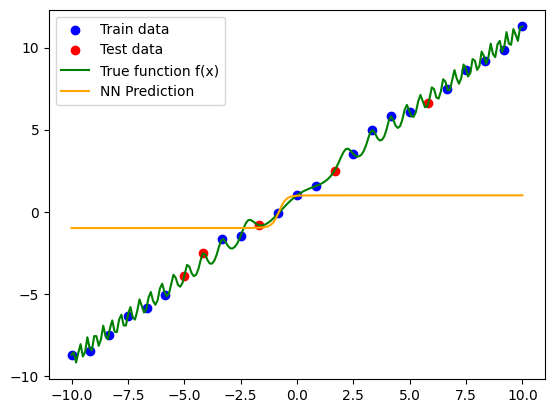

In [ ]:
plt.scatter(X_train, Y_train, color="blue", label="Train data")
plt.scatter(X_test, Y_test, color="red", label="Test data")

x_line = np.linspace(-10, 10, 200).reshape(-1, 1)
plt.plot(x_line, f(x_line), label="True function f(x)", color="green")
plt.plot(x_line, predict(x_line), label="NN Prediction", color="orange")
plt.legend()
plt.show()
